In [1]:
import os
import warnings
from pathlib import Path

import GEOparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ignore warnings
warnings.filterwarnings("ignore")

# 1. Get the data from GEO (Gene Expression Omnibus) database

## 1.1. Download the data from GEO database

In [2]:
gse = GEOparse.get_GEO(geo="GSE28746", destdir="./data/")

05-Dec-2024 16:39:41 DEBUG utils - Directory ./data/ already exists. Skipping.
05-Dec-2024 16:39:41 INFO GEOparse - File already exist: using local version.
05-Dec-2024 16:39:41 INFO GEOparse - Parsing ./data/GSE28746_family.soft.gz: 
05-Dec-2024 16:39:41 DEBUG GEOparse - DATABASE: GeoMiame
05-Dec-2024 16:39:41 DEBUG GEOparse - SERIES: GSE28746
05-Dec-2024 16:39:41 DEBUG GEOparse - PLATFORM: GPL8490
05-Dec-2024 16:39:41 DEBUG GEOparse - SAMPLE: GSM712302
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712303
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712304
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712305
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712306
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712307
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712308
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712309
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712310
05-Dec-2024 16:39:42 DEBUG GEOparse - SAMPLE: GSM712311
05-Dec-2024 16:39:42 DEBUG GEOparse -

## 1.2. GEO terms and definitions

**GSM (GEO Sample)**

Refers to an individual sample in a dataset, containing metadata (e.g., tissue type, experimental conditions) and a data table with measurement results (e.g., gene expression levels).  

**GPL (GEO Platform)**

Describes the platform used for the experiment, such as microarrays or sequencers. It includes metadata about the technology and a table mapping probes to genes or transcripts.  

In [3]:
gse.gsms

{'GSM712302': <SAMPLE: GSM712302>,
 'GSM712303': <SAMPLE: GSM712303>,
 'GSM712304': <SAMPLE: GSM712304>,
 'GSM712305': <SAMPLE: GSM712305>,
 'GSM712306': <SAMPLE: GSM712306>,
 'GSM712307': <SAMPLE: GSM712307>,
 'GSM712308': <SAMPLE: GSM712308>,
 'GSM712309': <SAMPLE: GSM712309>,
 'GSM712310': <SAMPLE: GSM712310>,
 'GSM712311': <SAMPLE: GSM712311>,
 'GSM712312': <SAMPLE: GSM712312>,
 'GSM712313': <SAMPLE: GSM712313>,
 'GSM712314': <SAMPLE: GSM712314>,
 'GSM712315': <SAMPLE: GSM712315>,
 'GSM712316': <SAMPLE: GSM712316>,
 'GSM712317': <SAMPLE: GSM712317>,
 'GSM712318': <SAMPLE: GSM712318>,
 'GSM712319': <SAMPLE: GSM712319>,
 'GSM712320': <SAMPLE: GSM712320>,
 'GSM712321': <SAMPLE: GSM712321>,
 'GSM712322': <SAMPLE: GSM712322>,
 'GSM712323': <SAMPLE: GSM712323>,
 'GSM712324': <SAMPLE: GSM712324>,
 'GSM712325': <SAMPLE: GSM712325>,
 'GSM712326': <SAMPLE: GSM712326>,
 'GSM712327': <SAMPLE: GSM712327>,
 'GSM712328': <SAMPLE: GSM712328>,
 'GSM712329': <SAMPLE: GSM712329>,
 'GSM712330': <SAMPL

In [4]:
gse.gpls

{'GPL8490': <d: GPL8490>}

In [5]:
print()
print("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break

print()
print("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print("Name: ", gpl_name)
    print("Metadata:",)
    for key, value in gpl.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print("Table data:",)
    print(gpl.table.head())
    break


GSM example:
Name:  GSM712302
Metadata:
 - title : 111
 - geo_accession : GSM712302
 - status : Public on Apr 21 2011
 - submission_date : Apr 20 2011
 - last_update_date : Apr 21 2011
 - type : genomic
 - channel_count : 1
 - source_name_ch1 : saliva sample
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : pair id number: 1, sexual_orientation: Homosexual, race: White, age: 40
 - molecule_ch1 : genomic DNA
 - extract_protocol_ch1 : genomic DNA was extracted and purified from saliva samples collected with the Oragene DNA system, according to Genotek's standard instructions
 - label_ch1 : Cy5 and Cy3
 - label_protocol_ch1 : Standard Illumina Protocol
 - hyb_protocol : bisulphite converted DNA was amplified, fragmented and hybridised to Illumina Infinium Human Methylation27 Beadchip using standard Illumina protocol
 - scan_protocol : Arrays were imaged using BeadArray Reader using standard recommended Illumina scanner setting
 - description : 4671944015K
 - dat

In [ ]:
gse.gsms['GSM712302']

{'title': ['111'],
 'geo_accession': ['GSM712302'],
 'status': ['Public on Apr 21 2011'],
 'submission_date': ['Apr 20 2011'],
 'last_update_date': ['Apr 21 2011'],
 'type': ['genomic'],
 'channel_count': ['1'],
 'source_name_ch1': ['saliva sample'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['pair id number: 1',
  'sexual_orientation: Homosexual',
  'race: White',
  'age: 40'],
 'molecule_ch1': ['genomic DNA'],
 'extract_protocol_ch1': ["genomic DNA was extracted and purified from saliva samples collected with the Oragene DNA system, according to Genotek's standard instructions"],
 'label_ch1': ['Cy5 and Cy3'],
 'label_protocol_ch1': ['Standard Illumina Protocol'],
 'hyb_protocol': ['bisulphite converted DNA was amplified, fragmented and hybridised to Illumina Infinium Human Methylation27 Beadchip using standard Illumina protocol'],
 'scan_protocol': ['Arrays were imaged using BeadArray Reader using standard recommended Illumina scanner setting

## 1.3. GSM Illumina Methylation Array Data

**Detection Confidence:**

Illumina methylation arrays often include detection p-values to assess whether the measured methylation signal at a CpG site is distinguishable from background noise. A p-value could mean the signal is confidently detected at the CpG sites listed, reflecting extremely low noise or measurement error.

**Group Comparison:**

If these p-values result from comparing groups (e.g., methylation differences between discordant twin pairs), the high significance might indicate consistent, reproducible differences in methylation across samples.


In [7]:
# 4671944015K represents label of the sample
# Low p-values mean 
gse.gsms['GSM712302'].table

,ID_REF,VALUE,4671944015K.pval
0,cg00000292,0.790114,3.680000e-38
1,cg00002426,0.682118,3.680000e-38
2,cg00003994,0.071778,3.680000e-38
3,cg00005847,0.193069,3.680000e-38
4,cg00006414,0.062389,3.680000e-38
...,...,...,...
27573,cg27657283,0.046561,3.680000e-38
27574,cg27661264,0.386896,3.680000e-38
27575,cg27662379,0.043485,3.680000e-38
27576,cg27662877,0.045624,3.680000e-38


## 1.4. Platform Information and CpG Sites Metadata

In [8]:
gse.gpls

{'GPL8490': <d: GPL8490>}

In [9]:
gse.gpls['GPL8490'].metadata

{'title': ['Illumina HumanMethylation27 BeadChip (HumanMethylation27_270596_v.1.2)'],
 'geo_accession': ['GPL8490'],
 'status': ['Public on Apr 27 2009'],
 'submission_date': ['Apr 27 2009'],
 'last_update_date': ['Jan 02 2015'],
 'technology': ['oligonucleotide beads'],
 'distribution': ['commercial'],
 'organism': ['Homo sapiens'],
 'taxid': ['9606'],
 'manufacturer': ['Illumina, Inc.'],
 'manufacture_protocol': ["See manufacturer's website"],
 'description': ['HumanMethylation27 DNA Analysis BeadChip allows researchers to interrogate 27,578 highly informative CpG sites per sample at single-nucleotide resolution. This 12-sample BeadChip features content derived from the well-annotated NCBI CCDS database (Genome Build 36) and is supplemented with more than 1,000 cancer-related genes described in published literature. Probe content has been enriched to deeply cover more than 150 well-established cancer genes known to show differential methylation patterns. HumanMethylation27 BeadChip c

In [10]:
gpl_table = gse.gpls['GPL8490'].table
gpl_table

,ID,Name,IlmnStrand,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,GenomeBuild,Chr,MapInfo,...,Distance_to_TSS,CPG_ISLAND,CPG_ISLAND_LOCATIONS,MIR_CPG_ISLAND,RANGE_GB,RANGE_START,RANGE_END,RANGE_STRAND,GB_ACC,ORF
0,cg00000292,cg00000292,TOP,990370,AAACATTAATTACCAACCACTCTTCCAAAAAACACTTACCATTAAA...,6660678,AAACATTAATTACCAACCGCTCTTCCAAAAAACACTTACCATTAAA...,36,16,28797601,...,291.0,True,16:28797486-28797825,NaN,NC_000016.8,28797486.0,28797825.0,+,NM_173201.2,487
1,cg00002426,cg00002426,TOP,6580397,AATATAATAACATTACCTTACCCATCTTATAATCAAACCAAACAAA...,6100343,AATATAATAACATTACCTTACCCGTCTTATAATCAAACCAAACGAA...,36,3,57718583,...,369.0,True,3:57716811-57718675,NaN,NC_000003.10,57716811.0,57718675.0,+,NM_007159.2,7871
2,cg00003994,cg00003994,TOP,7150184,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,7150392,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,36,7,15692387,...,432.0,True,7:15691512-15693551,NaN,NC_000007.12,15691512.0,15693551.0,-,NM_005924.3,4223
3,cg00005847,cg00005847,BOT,4850717,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAA...,1260113,TACTATAATACACCCTATATTTAAAACACTAAACTTACCCCATTAA...,36,2,176737319,...,268.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NM_006898.4,3232
4,cg00006414,cg00006414,BOT,6980731,CTCAAAAACCAAACAAAACAAAACCCCAATACTAATCATTAATAAA...,4280093,CTCGAAAACCGAACAAAACAAAACCCCAATACTAATCGTTAATAAA...,36,7,148453770,...,671.0,True,7:148453584-148455804,NaN,NC_000007.12,148453584.0,148455804.0,+,NM_020781.2,57541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27573,cg27657283,cg27657283,TOP,510452,AAACCAAAAATTCCTCTAACTACAACTTAAATACCCATAATCTTCC...,7510537,AAACCAAAAATTCCTCTAACTACAACTTAAATACCCATAATCTTCC...,36,1,43006110,...,840.0,True,1:43004664-43006120,NaN,NC_000001.9,43004664.0,43006120.0,-,NM_022356.2,64175
27574,cg27661264,cg27661264,BOT,7210519,TAACTAATTTAAAATCTTTCTCCTCACTTCTCCACTAACCAAAAAA...,6840035,TAACTAATTTAAAATCTTTCTCCTCGCTTCTCCGCTAACCAAAAAA...,36,20,56861133,...,NaN,True,20:56860981-56861502,NaN,NC_000020.9,56860981.0,56861502.0,+,NT_011362.9,2778
27575,cg27662379,cg27662379,BOT,60167,CACTAAACAACCATTCATTAAACAAAAACTAATAACACAAAATAAC...,4570626,CACTAAACAACCGTTCATTAAACAAAAACTAATAACACAAAATAAC...,36,3,129852443,...,34.0,True,3:129851499-129852999,NaN,NC_000003.10,129851499.0,129852999.0,-,NM_002950.3,6184
27576,cg27662877,cg27662877,TOP,2120673,ACCTATACAAAATCCAATCTTATAAAAACAACAAACTAAACAACAA...,3180717,ACCTATACAAAATCCAATCTTATAAAAACGACGAACTAAACAACGA...,36,18,70110575,...,374.0,True,18:70108996-70110872,NaN,NC_000018.8,70108996.0,70110872.0,-,NM_148923.2,1528


In [11]:
gpl_table.columns

Index(['ID', 'Name', 'IlmnStrand', 'AddressA_ID', 'AlleleA_ProbeSeq',
       'AddressB_ID', 'AlleleB_ProbeSeq', 'GenomeBuild', 'Chr', 'MapInfo',
       'Ploidy', 'Species', 'Source', 'SourceVersion', 'SourceStrand',
       'SourceSeq', 'TopGenomicSeq', 'Next_Base', 'Color_Channel',
       'TSS_Coordinate', 'Gene_Strand', 'Gene_ID', 'Symbol', 'Synonym',
       'Accession', 'GID', 'Annotation', 'Product', 'Distance_to_TSS',
       'CPG_ISLAND', 'CPG_ISLAND_LOCATIONS', 'MIR_CPG_ISLAND', 'RANGE_GB',
       'RANGE_START', 'RANGE_END', 'RANGE_STRAND', 'GB_ACC', 'ORF'],
      dtype='object')

In [12]:
gpl_table['CPG_ISLAND'].value_counts()

CPG_ISLAND
True     20006
False     7572
Name: count, dtype: int64

In [13]:
gpl_table['Symbol'].value_counts()

Symbol
GNAS        30
MGMT        26
KCNQ1       23
ALX4        23
RB1         21
            ..
SEC31L1      1
FSHB         1
NFKBIB       1
PFKM         1
FLJ35767     1
Name: count, Length: 14476, dtype: int64

## 1.5. Chromosome Distribution of CpG Sites compared to the Human Genome

In [14]:
homo_sapiens_genes = pd.read_table("https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz")
homo_sapiens_genes

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20241127,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20241127,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000291190|AllianceGe...,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20240917,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20241127,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20241127,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193370,741158,8923215,trnD,-,-,-,MT,-,tRNA-Asp,tRNA,-,-,-,-,20200909,-
193371,741158,8923216,trnP,-,-,-,MT,-,tRNA-Pro,tRNA,-,-,-,-,20200909,-
193372,741158,8923217,trnA,-,-,-,MT,-,tRNA-Ala,tRNA,-,-,-,-,20200909,-
193373,741158,8923218,COX1,-,-,-,MT,-,cytochrome c oxidase subunit I,protein-coding,-,-,-,cytochrome c oxidase subunit I,20230818,-


In [15]:
homo_sapiens_genes['type_of_gene'].value_counts()

type_of_gene
biological-region    128261
ncRNA                 22117
protein-coding        20621
pseudo                17483
snoRNA                 1201
unknown                1191
other                   845
rRNA                    785
tRNA                    701
snRNA                   166
scRNA                     4
Name: count, dtype: int64

In [16]:
# Chromosome distribution
cpg_chromosome_counts = gpl_table['Chr'].value_counts()
protein_coding_genes_chromosome_counts = homo_sapiens_genes.loc[
    homo_sapiens_genes['type_of_gene'] == 'protein-coding', 'chromosome'
].value_counts()

# Combine data into a DataFrame for easy plotting
data = pd.DataFrame({
    'CpG Counts': cpg_chromosome_counts,
    'Protein Coding Genes': protein_coding_genes_chromosome_counts
}).reset_index().rename(columns={'index': 'Chromosome'})

# Select only exact Chromosomes
data = data[data['Chromosome'].str.contains('[1-2]|^X$|^Y$')]

# Normalize data for consistent scaling
data[['CpG Counts', 'Protein Coding Genes']] = data[['CpG Counts', 'Protein Coding Genes']].apply(
    lambda x: x / x.max()
)

data

,Chromosome,CpG Counts,Protein Coding Genes
1,1,1.000000,1.000000
2,10,0.359848,0.353839
3,11,0.597452,0.629948
4,12,0.526515,0.494516
5,13,0.169766,0.168813
6,14,0.286846,0.298999
7,15,0.285468,0.302814
8,16,0.412534,0.420601
9,17,0.546143,0.563186
10,18,0.136019,0.132093


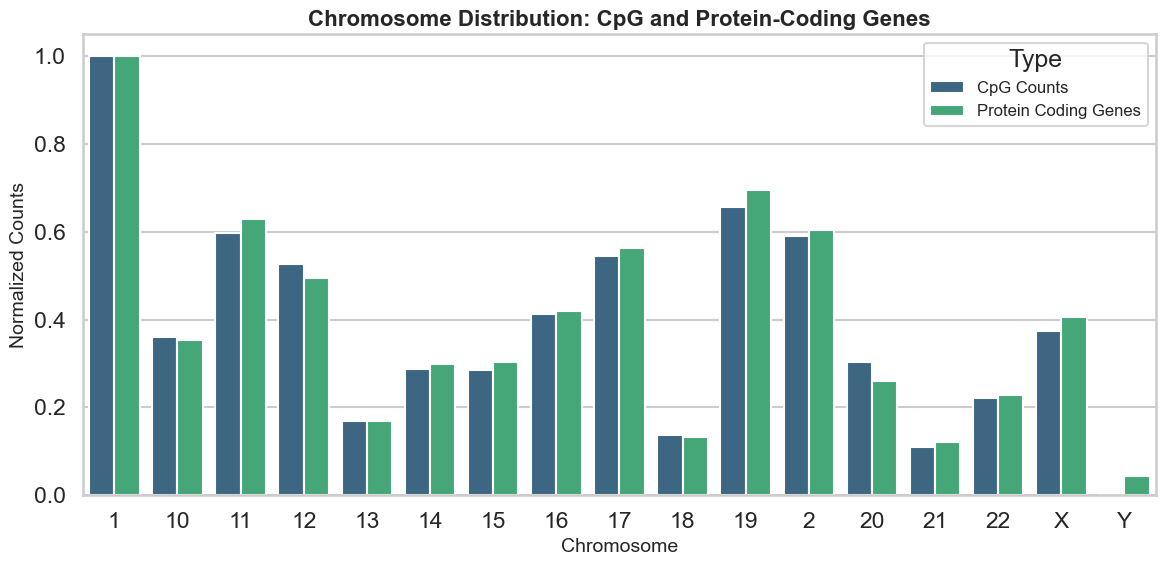

In [17]:
# Set style
sns.set_theme(style="whitegrid", context="talk")

# Two-bar plot per chromosome
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=data.melt(id_vars=['Chromosome'], 
                   var_name='Type', 
                   value_name='Counts'),
    x='Chromosome', 
    y='Counts', 
    hue='Type',
    palette='viridis'
)
bar_plot.set_title("Chromosome Distribution: CpG and Protein-Coding Genes", fontsize=16, weight='bold')
bar_plot.set_xlabel("Chromosome", fontsize=14)
bar_plot.set_ylabel("Normalized Counts", fontsize=14)
bar_plot.legend(title="Type", loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

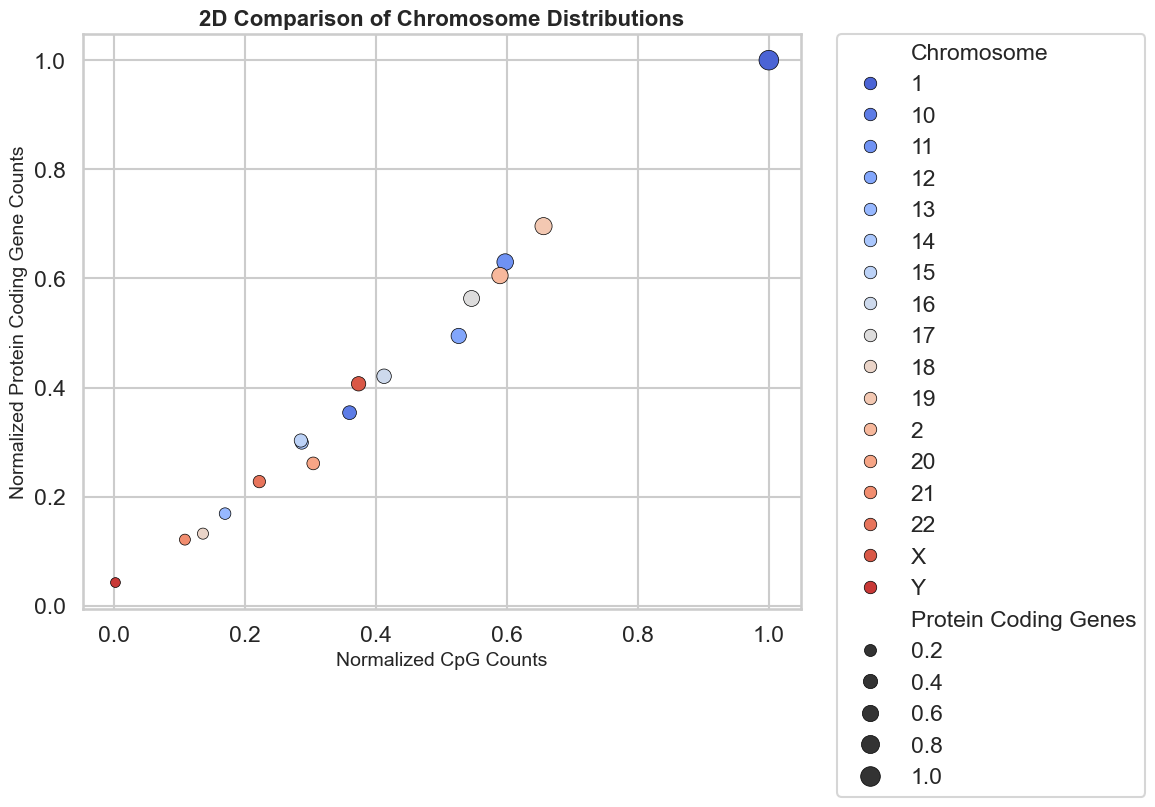

In [18]:
# 2D Scatter Plot for Comparison
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=data, 
    x='CpG Counts', 
    y='Protein Coding Genes',
    hue='Chromosome',
    size='Protein Coding Genes',
    sizes=(50, 200),
    palette='coolwarm',
    edgecolor="black",
    linewidth=0.5
)
scatter_plot.set_title("2D Comparison of Chromosome Distributions", fontsize=16, weight='bold')
scatter_plot.set_xlabel("Normalized CpG Counts", fontsize=14)
scatter_plot.set_ylabel("Normalized Protein Coding Gene Counts", fontsize=14)
scatter_plot.legend(title="Chromosome", loc='best', fontsize=12)

# Put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

# 2. Samples Metadata Exploration

In [19]:
gsm_metadata_to_df = []

for gsm_name, gsm in gse.gsms.items():
    gsm_metadata_to_df.append({
        'GSM': gsm_name,
        'source_name_ch1': gsm.metadata['source_name_ch1'][0],
        'sexual_orientation': gsm.metadata['characteristics_ch1'][1].replace('sexual_orientation: ', ''),
        'race': gsm.metadata['characteristics_ch1'][2].replace('race: ', ''),
        'age': gsm.metadata['characteristics_ch1'][3].replace('age: ', ''),
    })

gsm_metadata_df = pd.DataFrame(gsm_metadata_to_df)
gsm_metadata_df['age'] = gsm_metadata_df['age'].astype(int)
gsm_metadata_df
    

,GSM,source_name_ch1,sexual_orientation,race,age
0,GSM712302,saliva sample,Homosexual,White,40
1,GSM712303,saliva sample,Heterosexual,White,40
2,GSM712304,saliva sample,Homosexual,White,40
3,GSM712305,saliva sample,Heterosexual,White,40
4,GSM712306,saliva sample,Homosexual,White,39
...,...,...,...,...,...
79,GSM712381,saliva sample,Homosexual,Af Am,35
80,GSM712382,saliva sample,Heterosexual,Af Am,35
81,GSM712383,saliva sample,Homosexual,White,37
82,GSM712384,saliva sample,Heterosexual,White,37


In [20]:
gsm_metadata_df['source_name_ch1'].value_counts()

source_name_ch1
saliva sample    84
Name: count, dtype: int64

In [21]:
gsm_metadata_df['race'].value_counts()  

race
White     74
Af Am      6
Latino     4
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

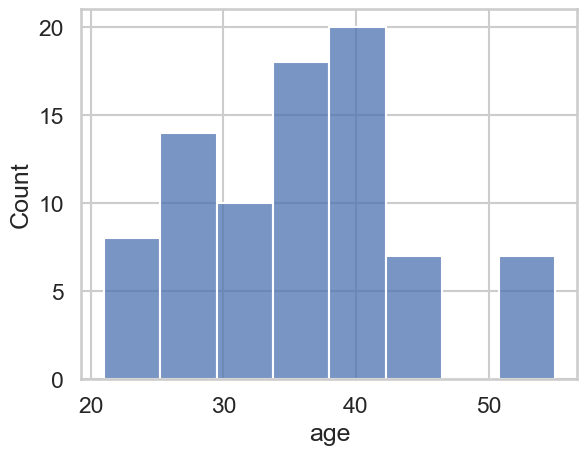

In [22]:
# Plot the distribution of the age of the participants
sns.histplot(gsm_metadata_df['age'])

In [23]:
gsm_metadata_df['age'].astype(int).describe()   

count    84.000000
mean     35.904762
std       8.305346
min      21.000000
25%      29.000000
50%      37.000000
75%      40.000000
max      55.000000
Name: age, dtype: float64

<Axes: xlabel='count', ylabel='sexual_orientation'>

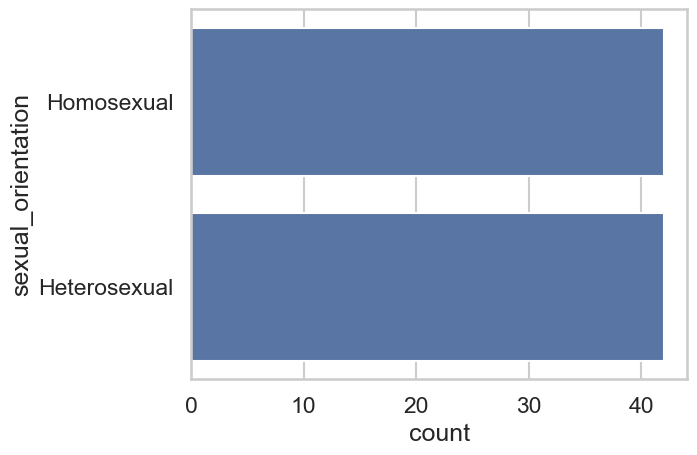

In [24]:
# Plot the distribution of the sexual orientation of the participants
sns.countplot(gsm_metadata_df['sexual_orientation'])

# 3. CpG sites analysis

## 3.1. Gathering all GSM data tables to the one DataFrame: CpG sites as columns (features), GSM as rows

In [25]:
gsm_values = []

for gsm_name, gsm in gse.gsms.items():
    # Fill missing values with the mean (not the best approach)
    values = gsm.table['VALUE'].fillna(gsm.table['VALUE'].mean())
    
    # Rename series name to gsm name
    values.name = gsm_name
    
    gsm_values.append(values)

cpg_matrix = pd.concat(gsm_values, axis=1)
cpg_matrix['CpG'] = gse.gsms['GSM712302'].table['ID_REF']
cpg_matrix = cpg_matrix.set_index('CpG')
cpg_matrix = cpg_matrix.T
cpg_matrix = cpg_matrix.reset_index().rename(columns={'index': 'GSM'}).set_index('GSM')
cpg_matrix

CpG,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
GSM,,,,,,,,,,,,,,,,,,,,,
GSM712302,0.790114,0.682118,0.071778,0.193069,0.062389,0.048428,0.967453,0.023050,0.023487,0.787841,...,0.677211,0.054558,0.856433,0.055375,0.092243,0.046561,0.386896,0.043485,0.045624,0.046183
GSM712303,0.683727,0.445706,0.074375,0.155730,0.061903,0.035971,0.958629,0.019968,0.025660,0.768339,...,0.450127,0.036168,0.869446,0.082618,0.108548,0.049381,0.418838,0.034128,0.048038,0.040252
GSM712304,0.744658,0.402083,0.059162,0.136823,0.071598,0.041558,0.970743,0.028239,0.029349,0.743089,...,0.388671,0.043864,0.844754,0.064762,0.096965,0.075697,0.357728,0.033582,0.048945,0.046456
GSM712305,0.692422,0.551041,0.133027,0.291874,0.060443,0.050204,0.332599,0.031111,0.272620,0.739803,...,0.570194,0.029345,0.501980,0.075748,0.413044,0.310559,0.905741,0.027826,0.034292,0.600437
GSM712306,0.766270,0.550440,0.074744,0.188825,0.073632,0.037170,0.960194,0.020195,0.033395,0.797935,...,0.551490,0.046588,0.860874,0.067620,0.093421,0.067761,0.405881,0.046372,0.048445,0.041540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM712381,0.766877,0.637372,0.071865,0.222131,0.084875,0.052742,0.956665,0.029213,0.030209,0.725938,...,0.573052,0.045628,0.861267,0.071815,0.085262,0.075780,0.373927,0.039595,0.047506,0.045559
GSM712382,0.679415,0.359205,0.063523,0.144754,0.070814,0.055890,0.977864,0.019795,0.022914,0.800205,...,0.356381,0.036777,0.846081,0.060452,0.069982,0.047192,0.306184,0.032315,0.040080,0.034311
GSM712383,0.710026,0.240020,0.100834,0.178981,0.077295,0.044819,0.959480,0.021142,0.030072,0.811254,...,0.208333,0.042068,0.835345,0.090589,0.080835,0.064675,0.339075,0.037149,0.068082,0.044086


## 3.2. Cluster Analysis

In [26]:
from matplotlib import cm

def generate_colors(values, colormap_name='viridis'):
    cmap = plt.get_cmap(colormap_name)
    norm = plt.Normalize(vmin=min(values), vmax=max(values))
    return [cmap(norm(value)) for value in values]

# Convert the age metadata to numeric, if it isn't already
ages = gsm_metadata_df['age']

# Prepare colors
row_colors = generate_colors(ages, colormap_name='coolwarm')
column_colors = generate_colors(pd.factorize(gpl_table['Chr'])[0], colormap_name='hsv')

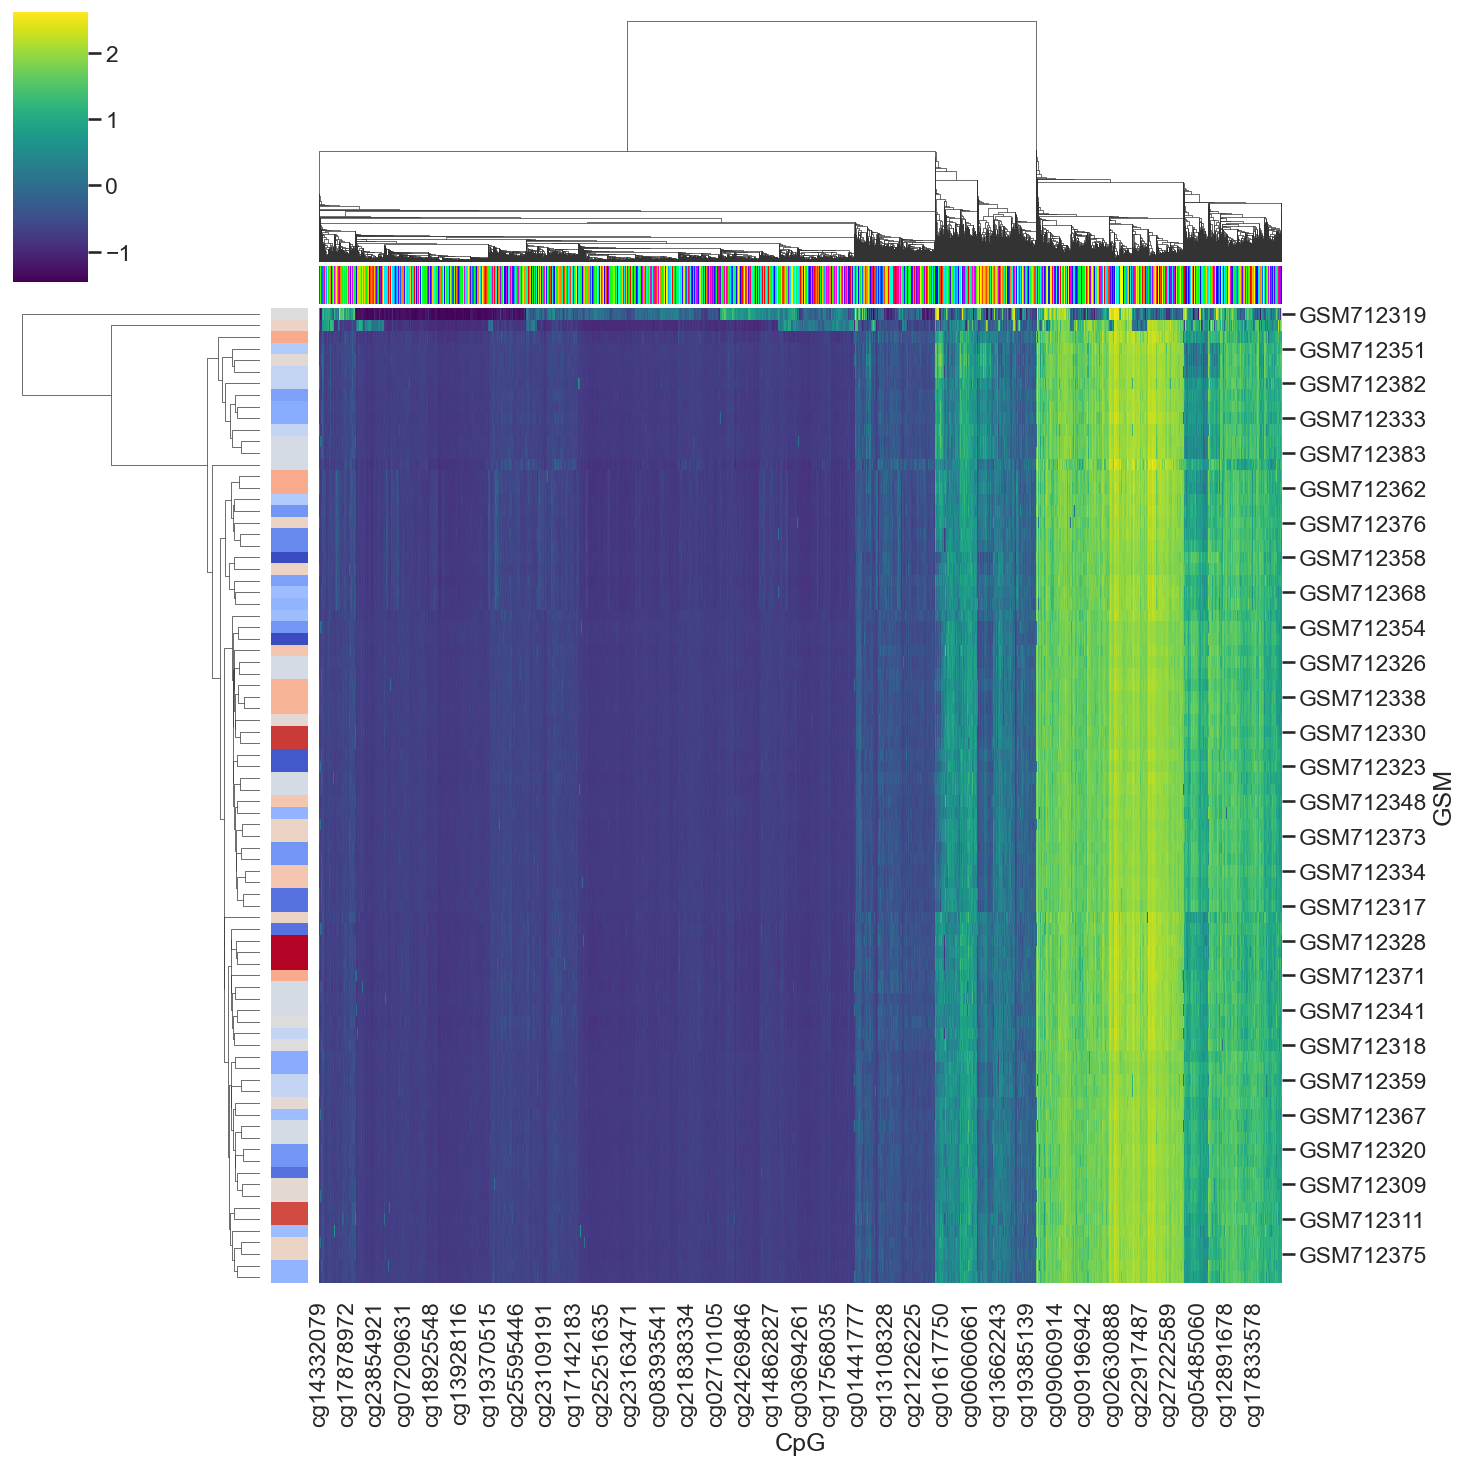

In [27]:
# Build sns clustermap
clustermap = sns.clustermap(
    cpg_matrix,
    cmap='viridis',
    figsize=(15, 15),
    z_score=0,
    row_colors=row_colors,
    col_colors=column_colors
)

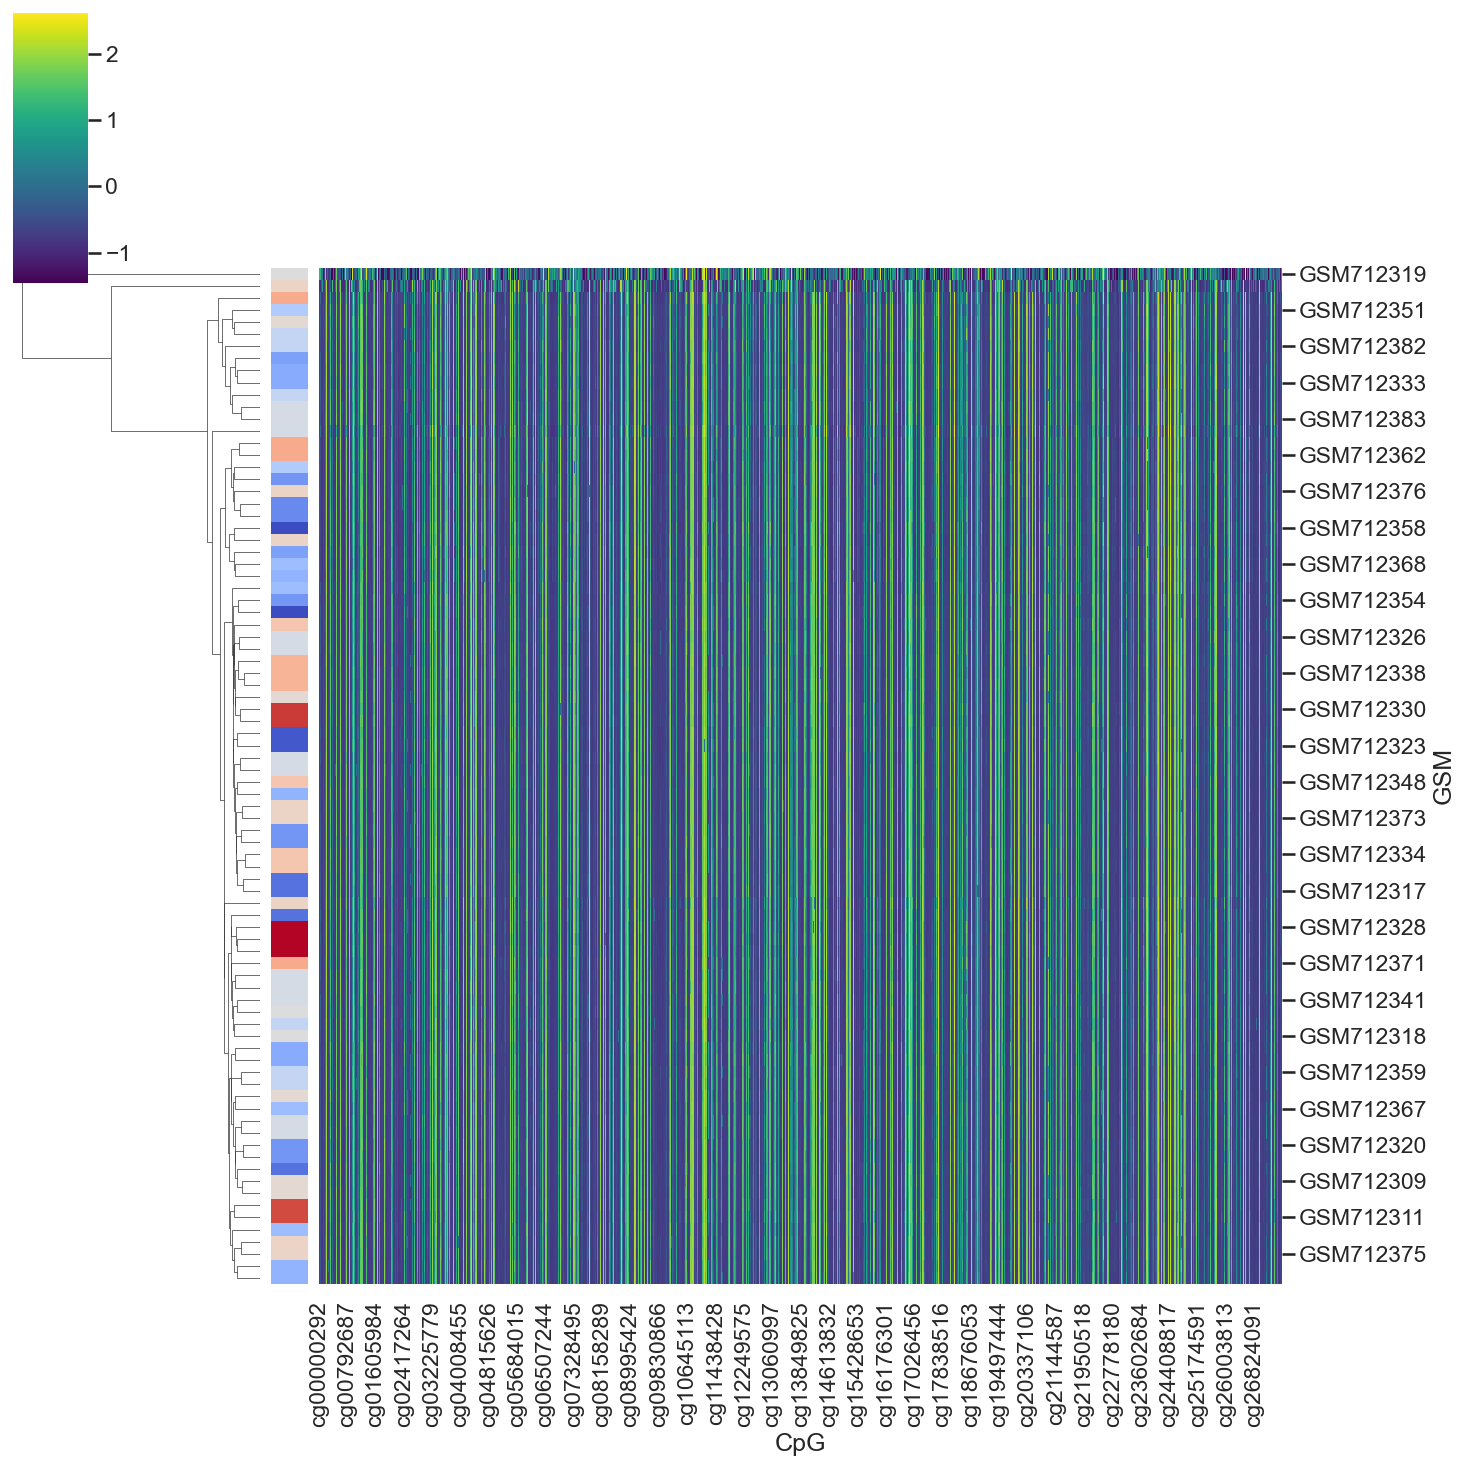

In [28]:
# Build sns clustermap with col_cluster=False
clustermap_2 = sns.clustermap(
    cpg_matrix,
    cmap='viridis',
    figsize=(15, 15),
    z_score=0,
    row_colors=row_colors,
    col_cluster=False,
)

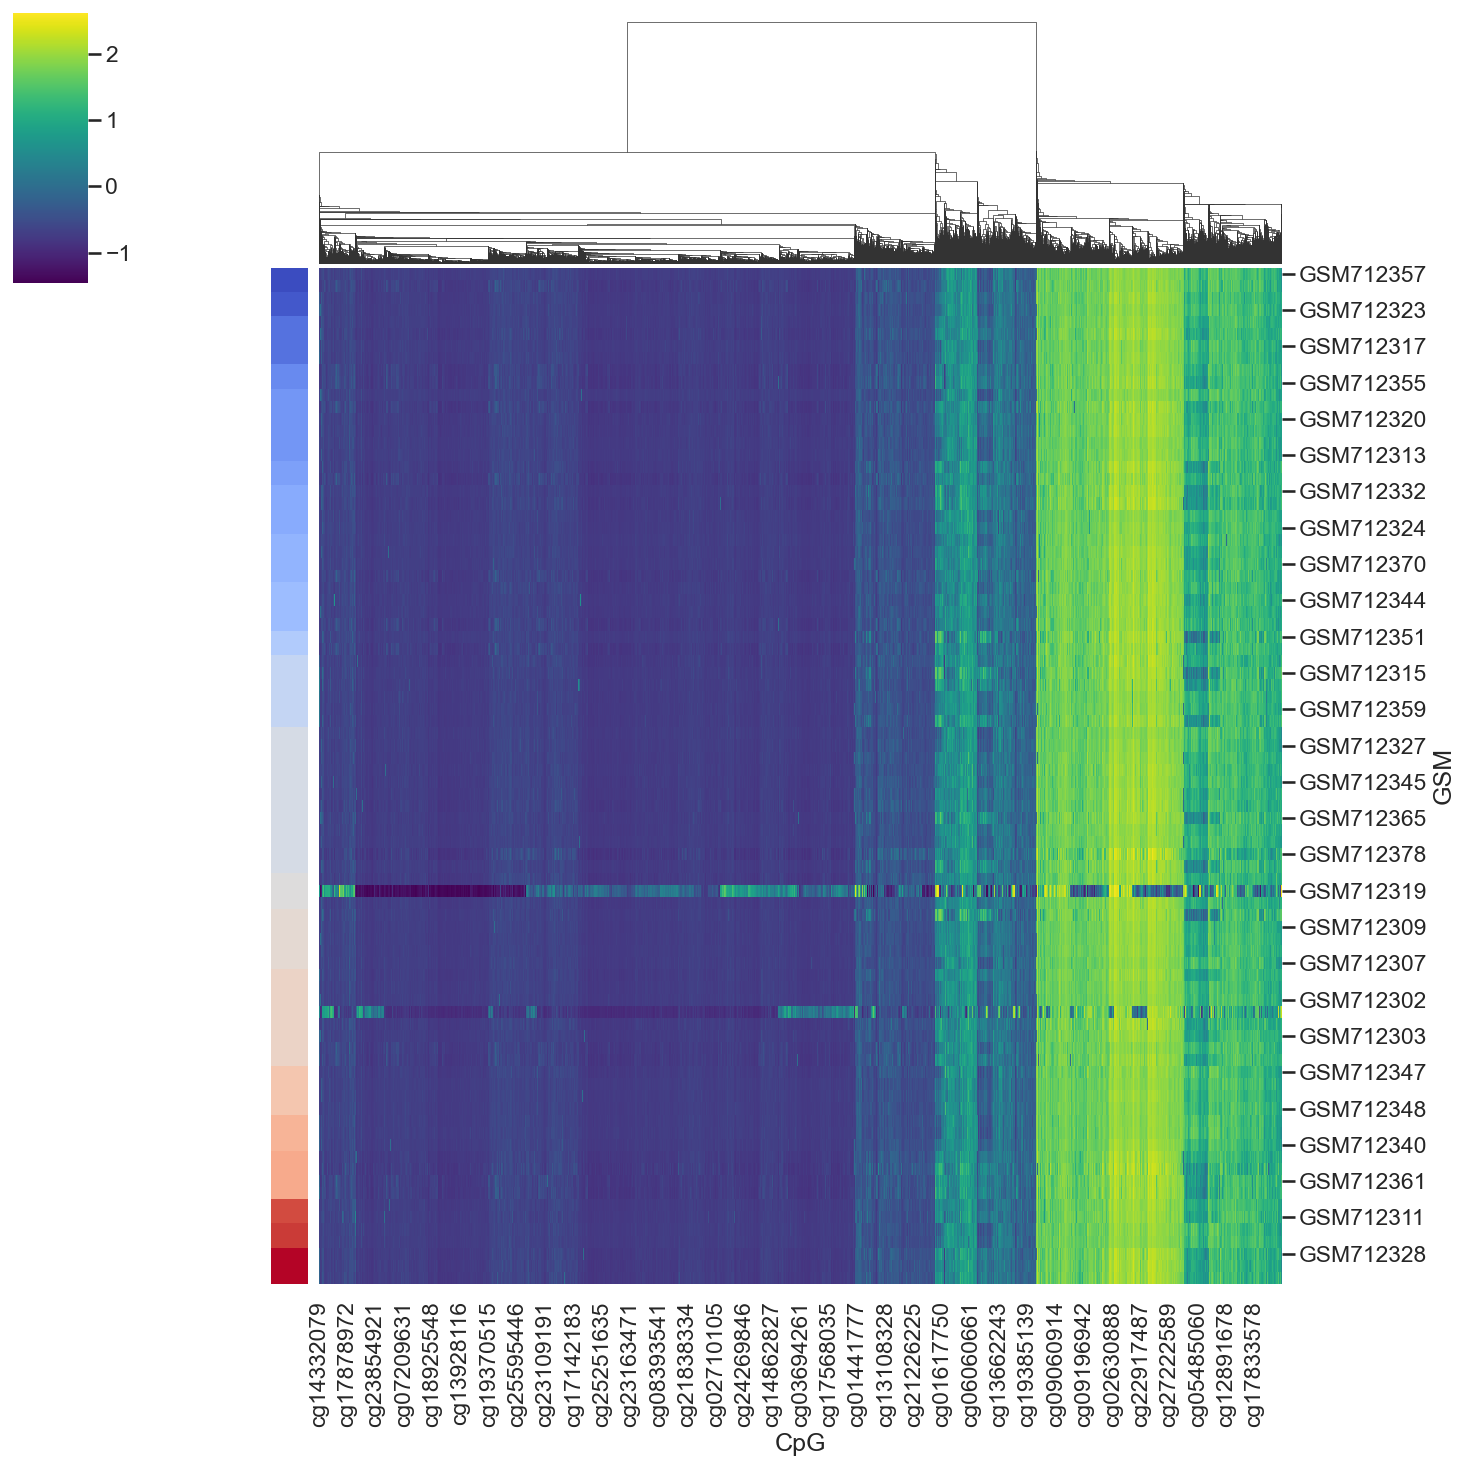

In [29]:
# Build sns clustermap with row_cluster=False, but rows sorted by age
cpg_matrix_age_sorted = cpg_matrix.copy()
cpg_matrix_age_sorted['age'] = list(ages.astype(int))
cpg_matrix_age_sorted = cpg_matrix_age_sorted.sort_values(by='age')
row_colors_age_sorted = generate_colors(cpg_matrix_age_sorted['age'], colormap_name='coolwarm')
cpg_matrix_age_sorted = cpg_matrix_age_sorted.drop('age', axis=1)

clustermap_3 = sns.clustermap(
    cpg_matrix_age_sorted,
    cmap='viridis',
    figsize=(15, 15),
    z_score=0,
    row_colors=row_colors_age_sorted,
    row_cluster=False,
)

## 3.3. UMAP for GSM samples

In [30]:
# Build UMAP
import umap

reducer_samples = umap.UMAP(random_state=42)
embedding_samples = reducer_samples.fit_transform(cpg_matrix)

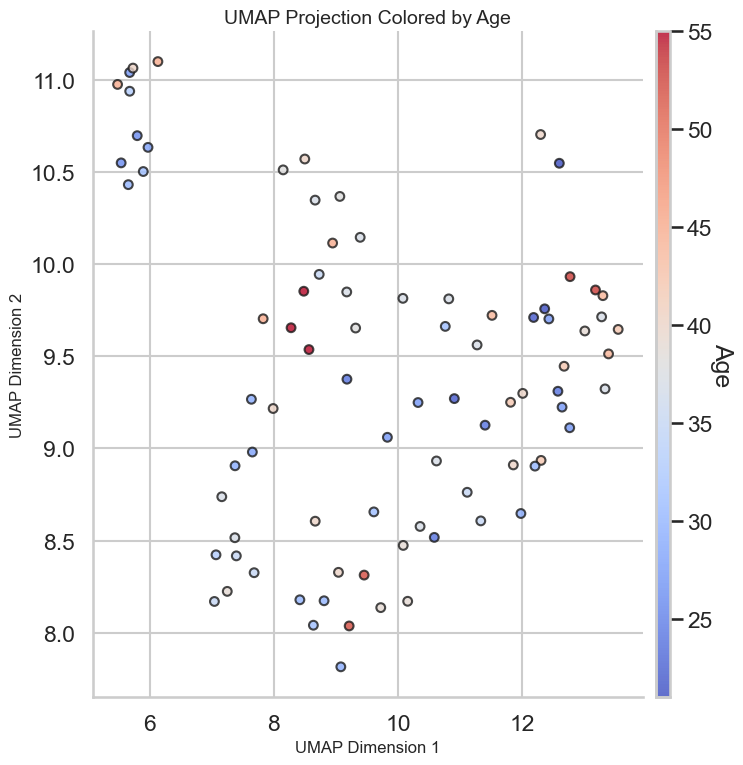

In [31]:
# Create a normalized continuous color scale for the ages
norm = plt.Normalize(gsm_metadata_df['age'].min(), gsm_metadata_df['age'].max())
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Start the figure
plt.figure(figsize=(8, 8))

# Scatter plot
scatter = plt.scatter(
    embedding_samples[:, 0], 
    embedding_samples[:, 1], 
    c=gsm_metadata_df['age'], 
    cmap=cmap,
    norm=norm,
    s=40,
    edgecolor='k', 
    alpha=0.8
)

# Add a color bar to indicate the age scale
cbar = plt.colorbar(scatter, aspect=50, pad=0.02)
cbar.set_label('Age', rotation=270, labelpad=15)

# Add axis labels and title
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.title('UMAP Projection Colored by Age', fontsize=14)

# Customize plot
sns.despine()
plt.tight_layout()

# Display the plot
plt.show()

## 3.4. UMAP for CpG sites

In [32]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(cpg_matrix.T)

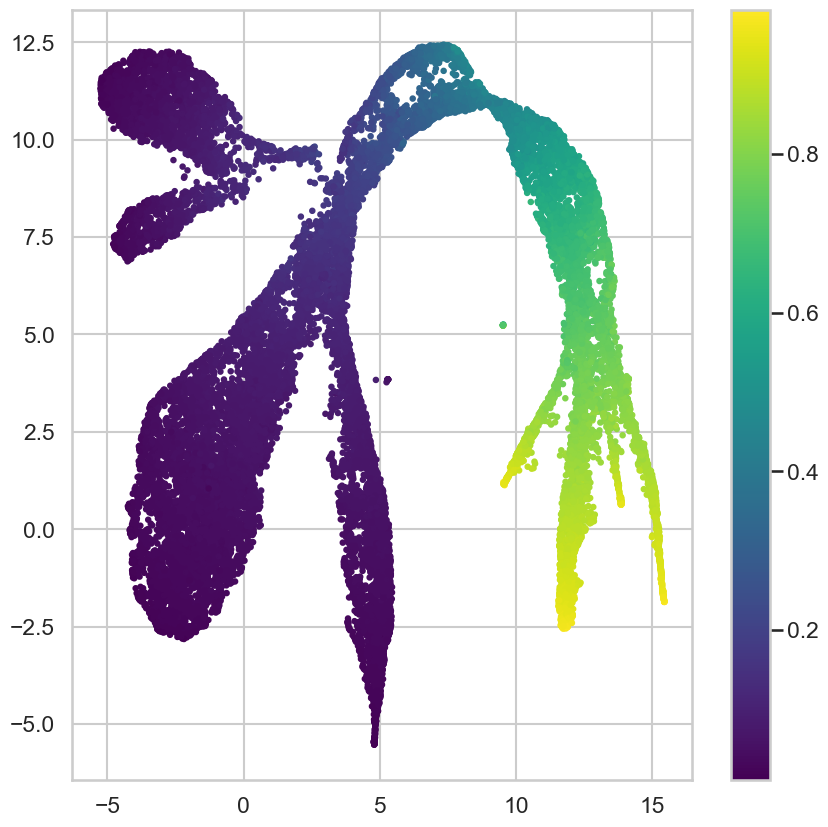

In [33]:
# Plot scatter plot with color based on average CpG value
plt.figure(figsize=(10, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=cpg_matrix.mean(axis=0), cmap='viridis', s=10)
plt.colorbar()

plt.show()


## 3.5. Test CpG sites value distribution on Normality

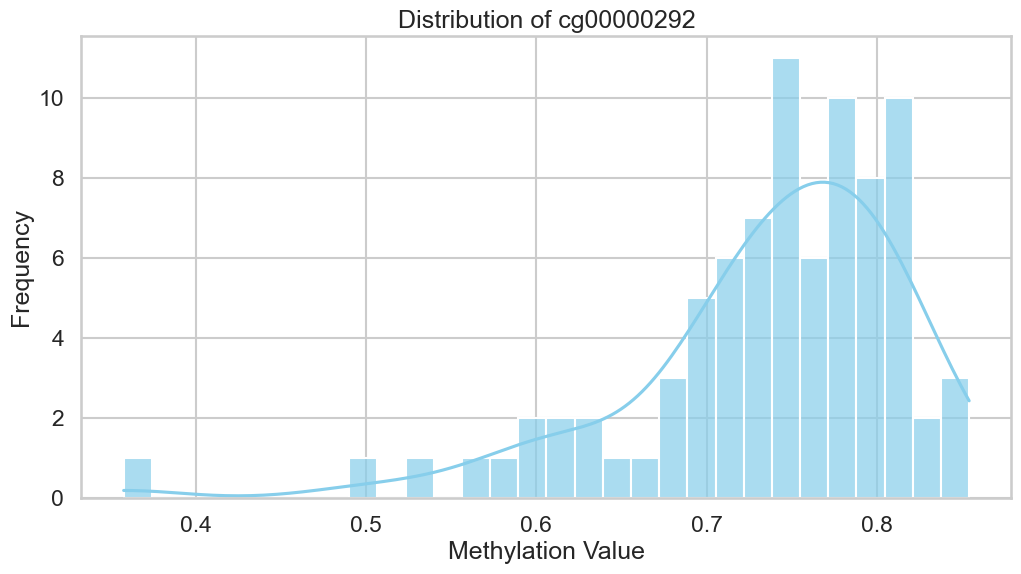

Statistics for cg00000292:
Mean: 0.735, Median: 0.749, Std Dev: 0.084
Skewness: -1.696, Kurtosis: 4.143
Shapiro-Wilk Test: Statistic=0.870, p=0.000
D’Agostino’s Test: Statistic=40.438, p=0.000
Gaussian Mixture Means: [0.76417217 0.61157741]
Gaussian Mixture Weights: [0.81012555 0.18987445]



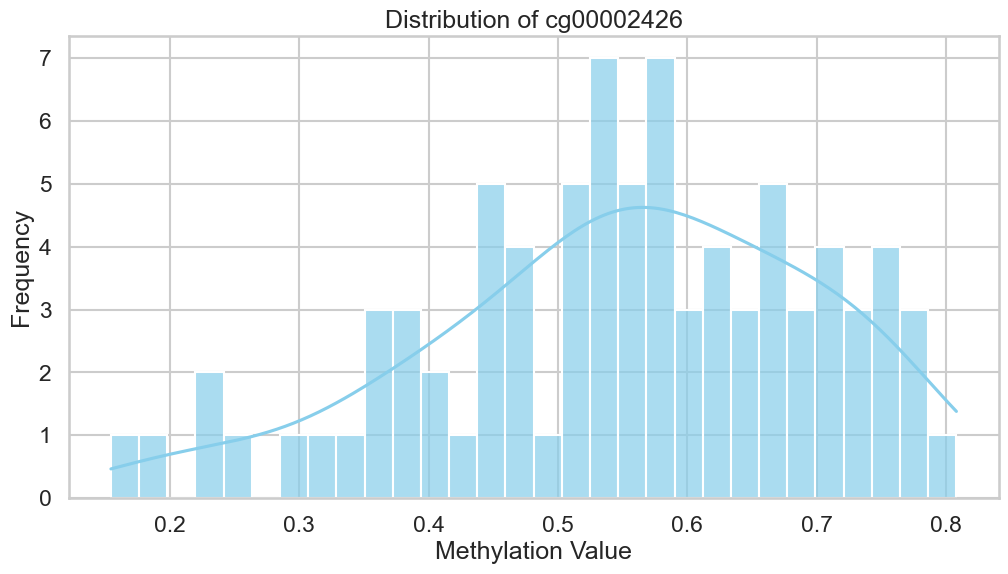

Statistics for cg00002426:
Mean: 0.549, Median: 0.554, Std Dev: 0.149
Skewness: -0.526, Kurtosis: -0.184
Shapiro-Wilk Test: Statistic=0.970, p=0.048
D’Agostino’s Test: Statistic=4.069, p=0.131
Gaussian Mixture Means: [0.61747402 0.39398395]
Gaussian Mixture Weights: [0.69161522 0.30838478]



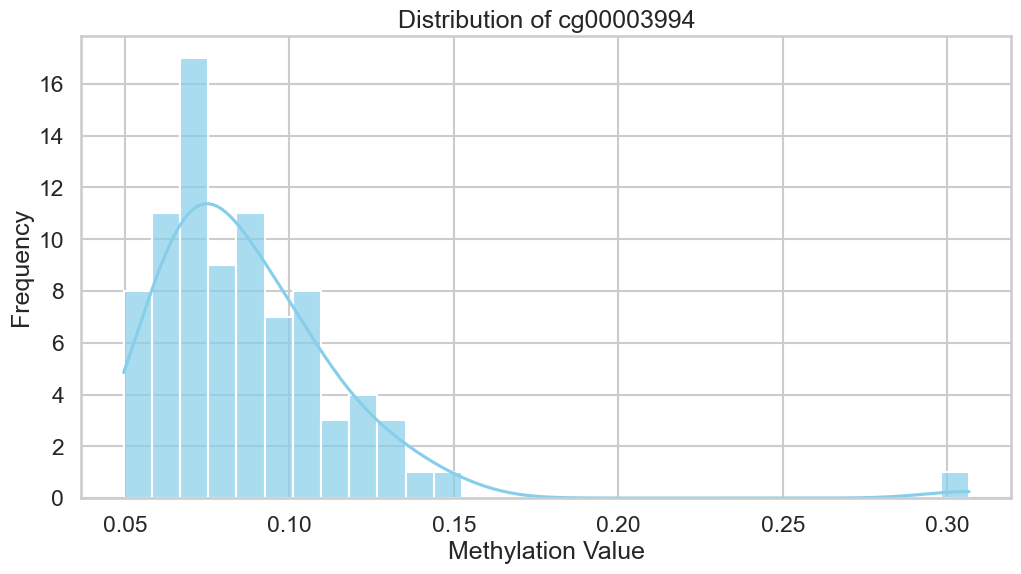

Statistics for cg00003994:
Mean: 0.088, Median: 0.081, Std Dev: 0.033
Skewness: 3.673, Kurtosis: 21.192
Shapiro-Wilk Test: Statistic=0.710, p=0.000
D’Agostino’s Test: Statistic=99.773, p=0.000
Gaussian Mixture Means: [0.08482753 0.22213156]
Gaussian Mixture Weights: [0.97755064 0.02244936]



In [34]:
from scipy.stats import shapiro, normaltest, skew, kurtosis
from sklearn.mixture import GaussianMixture

# Function to analyze a single CpG site
def analyze_cpg(cpg_values, column):
    
    # Visualization: Histogram and Density Plot
    plt.figure(figsize=(12, 6))
    sns.histplot(cpg_values, kde=True, bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Methylation Value')
    plt.ylabel('Frequency')
    plt.show()
    
    # Summary Statistics
    mean = np.mean(cpg_values)
    median = np.median(cpg_values)
    std_dev = np.std(cpg_values)
    skewness = skew(cpg_values)
    kurt = kurtosis(cpg_values)
    
    print(f"Statistics for {column}:")
    print(f"Mean: {mean:.3f}, Median: {median:.3f}, Std Dev: {std_dev:.3f}")
    print(f"Skewness: {skewness:.3f}, Kurtosis: {kurt:.3f}")
    
    # Normality Tests
    shapiro_stat, shapiro_p = shapiro(cpg_values)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p={shapiro_p:.3f}")
    
    d_agostino_stat, d_agostino_p = normaltest(cpg_values)
    print(f"D’Agostino’s Test: Statistic={d_agostino_stat:.3f}, p={d_agostino_p:.3f}")
    
    # Check Bimodality: Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm.fit(cpg_values.values.reshape(-1, 1))
    print(f"Gaussian Mixture Means: {gmm.means_.flatten()}")
    print(f"Gaussian Mixture Weights: {gmm.weights_.flatten()}")
    print()

# Analyze a subset of CpG columns
cpg_columns = cpg_matrix.columns[:3]
for column in cpg_columns:
    analyze_cpg(cpg_matrix[column], column)


In [35]:
normality_tests = []
for column in cpg_matrix.columns:
    normaltest_stat, normaltest_p = normaltest(cpg_matrix[column])
    normality_tests.append({
        'CpG': column,
        'Normality Statistic': normaltest_stat,
        'p-value': normaltest_p
    })

normality_tests_df = pd.DataFrame(normality_tests)
normality_tests_df

,CpG,Normality Statistic,p-value
0,cg00000292,40.438006,1.655764e-09
1,cg00002426,4.068526,1.307768e-01
2,cg00003994,99.773158,2.160399e-22
3,cg00005847,96.942244,8.897319e-22
4,cg00006414,3.930080,1.401503e-01
...,...,...,...
27573,cg27657283,118.356149,1.991997e-26
27574,cg27661264,108.127836,3.313895e-24
27575,cg27662379,1.396469,4.974628e-01
27576,cg27662877,10.121828,6.339761e-03


In [36]:
# Filter CpG sites with p-value < 0.05
# Big amount of CpG sites are not normally distributed
normality_tests_df[normality_tests_df['p-value'] < 0.05]

,CpG,Normality Statistic,p-value
0,cg00000292,40.438006,1.655764e-09
2,cg00003994,99.773158,2.160399e-22
3,cg00005847,96.942244,8.897319e-22
5,cg00007981,115.312821,9.123031e-26
6,cg00008493,180.589488,6.102263e-40
...,...,...,...
27572,cg27657249,142.415793,1.187964e-31
27573,cg27657283,118.356149,1.991997e-26
27574,cg27661264,108.127836,3.313895e-24
27576,cg27662877,10.121828,6.339761e-03


# 4. Differential Methylation Analysis

When testing thousands of CpG sites, adjust p-values to control the false discovery rate (FDR):

Bonferroni Correction: Conservative but simple.

Benjamini-Hochberg FDR: Less conservative and more commonly used for DMA.


In [37]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

def mul_test(group1_data, group2_data):
    results = []
    for cpg in cpg_matrix.columns:
        t_stat, p_val = ttest_ind(group1_data[cpg], group2_data[cpg], nan_policy='omit')
        results.append({'CpG': cpg, 't_stat': t_stat, 'p_val': p_val})
        
    results_df = pd.DataFrame(results)

    results_df['adjusted_p_val'] = multipletests(results_df['p_val'], method='fdr_bh')[1]
    
    significant_cpgs = results_df[results_df['adjusted_p_val'] < 0.05]
    
    return significant_cpgs


In [38]:
group1_data = cpg_matrix[list(gsm_metadata_df['sexual_orientation'] == 'Heterosexual')]
group2_data = cpg_matrix[list(gsm_metadata_df['sexual_orientation'] == 'Homosexual')]

# No significant CpG sites
mul_test(group1_data, group2_data)

,CpG,t_stat,p_val,adjusted_p_val


# 5. Train a Machine Learning Model for Epigenetic Age Prediction

In [39]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = cpg_matrix
y = gsm_metadata_df['age']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the MAE
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mse:.3f}")


Mean Absolute Error: 2.272


Mean Absolute Error (High Variance CpG Sites): 1.851


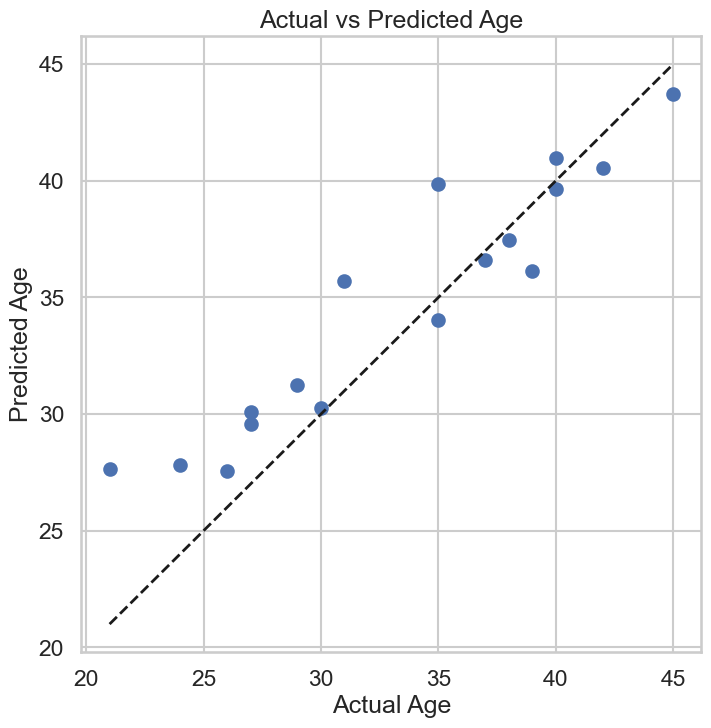

In [40]:
# Train the same model with only the significant CpG sites

# Remove CpG sites with low variance
X_train_var = X_train.loc[:, X_train.var() > 0.01]
X_test_var = X_test.loc[:, X_train.var() > 0.01]

# Train the model
model_var = LinearRegression()
model_var.fit(X_train_var, y_train)

# Predict the test set
y_pred_var = model_var.predict(X_test_var)

# Calculate the MAE
mse_var = mean_absolute_error(y_test, y_pred_var)

print(f"Mean Absolute Error (High Variance CpG Sites): {mse_var:.3f}")

# Plot the predicted vs actual ages
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

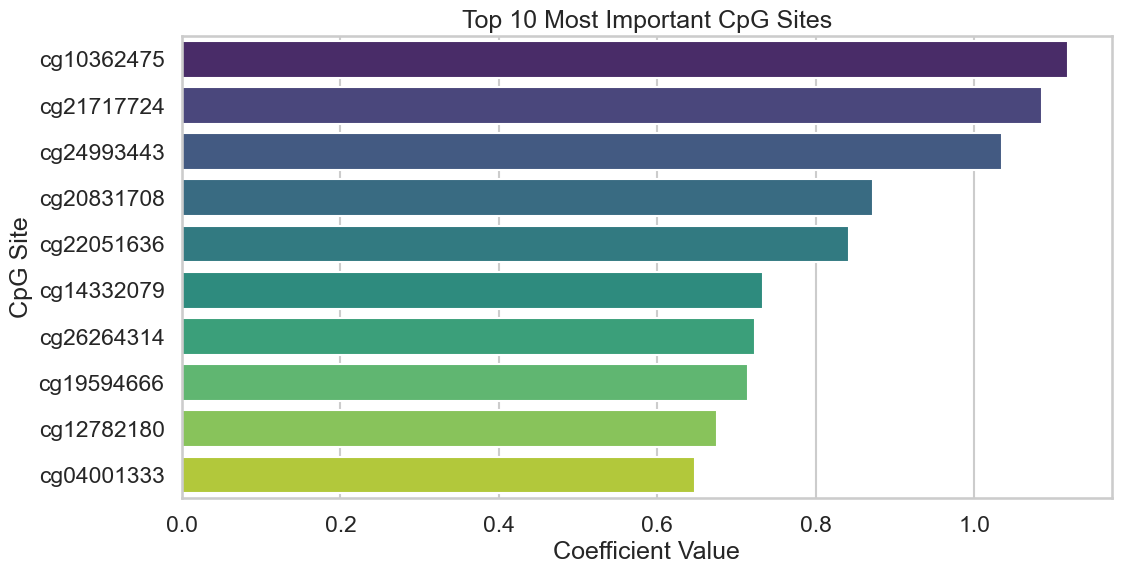

In [41]:
# Identify the most important CpG sites
coefficients = pd.Series(model.coef_, index=X_train.columns)
coefficients = coefficients.sort_values(ascending=False)

# Plot the top 10 most important CpG sites
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.head(10), y=coefficients.head(10).index, palette='viridis')
plt.title('Top 10 Most Important CpG Sites')
plt.xlabel('Coefficient Value')
plt.ylabel('CpG Site')
plt.show()


In [42]:
# Check genes of the most important CpG sites
important_cpgs = coefficients.head(100).index
important_genes = gpl_table[gpl_table['ID'].isin(important_cpgs)]['Symbol']
important_genes

217          FBLN2
1212     LOC124216
1551       KCNQ1DN
2009           NDN
2218         NOL10
           ...    
26959        HOXA9
27001       TPSAB1
27324       ZNF540
27358         DEXI
27481        KCNG3
Name: Symbol, Length: 100, dtype: object

In [43]:
# Check the distribution of the most important
important_genes.value_counts()

Symbol
DIRAS3       3
PSMD5        2
LOC124216    2
LEP          2
FLJ90036     2
            ..
HOXA9        1
TPSAB1       1
ZNF540       1
DEXI         1
KCNG3        1
Name: count, Length: 91, dtype: int64

In [44]:
# Genes from the publication
'EDARADD' in important_genes.values, 'TOM1L1' in important_genes.values, 'NPTX2' in important_genes.values,

(False, False, True)